In [5]:
import pandas as pd
df = pd.read_csv('dataset_olympics.csv')

In [6]:
# Display the attribute (column) names
print("Attribute names:\n", df.columns)

Attribute names:
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [7]:
#make a new column for bmi
df['Height'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
print(df[['Height', 'Weight','Sex','BMI']].head(10))

   Height  Weight Sex        BMI
0    1.80    80.0   M  24.691358
1    1.70    60.0   M  20.761246
2     NaN     NaN   M        NaN
3     NaN     NaN   M        NaN
4    1.85    82.0   F  23.959094
5    1.85    82.0   F  23.959094
6    1.85    82.0   F  23.959094
7    1.85    82.0   F  23.959094
8    1.85    82.0   F  23.959094
9    1.85    82.0   F  23.959094


In [8]:
# Descriptive statistics for numeric values
print(df[['Age','Weight','Height', 'BMI']].describe())

                Age        Weight        Height           BMI
count  67268.000000  52899.000000  53746.000000  52522.000000
mean      25.644645     70.900216      1.755053     22.809656
std        6.485239     14.217489      0.103842      2.939851
min       11.000000     25.000000      1.270000     12.267562
25%       21.000000     61.000000      1.680000     20.957274
50%       25.000000     70.000000      1.750000     22.530864
75%       28.000000     79.000000      1.830000     24.187046
max       88.000000    214.000000      2.230000     63.901580


In [9]:
# Calculate variance for multiple columns 
var_values = df[['Age','Weight', 'Height', 'BMI']].var()
print('The variance for age, height, weight and BMI is: \n')
print(var_values)

The variance for age, height, weight and BMI is: 

Age        42.058329
Weight    202.136997
Height      0.010783
BMI         8.642721
dtype: float64


In [10]:
# Calculate missing values for all columns
missing_values = df.isna().sum()

# Print missing values for each column
print('Missing values in each column:')
print(missing_values)

# Print the total number of missing values
print('\nTotal number of missing values:', missing_values.sum())


Missing values in each column:
ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
BMI       17478
dtype: int64

Total number of missing values: 113875


In [11]:
# Print the first 10 rows before handeling missing values
print('\nFirst 10 rows before handeling the missing values\n')
print(df.head(10))


First 10 rows before handeling the missing values

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0    1.80    80.0           China   
1   2                  A Lamusi   M  23.0    1.70    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0    1.85    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0    1.85    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0    1.85    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0    1.85    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0    1.85    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0    1.85    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer  

In [12]:
# Display the DataFrame before filling
print('\nDataFrame before replacing missing values:')
print(df)


DataFrame before replacing missing values:
          ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0    1.80    80.0   
1          2                        A Lamusi   M  23.0    1.70    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0    1.85    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0    1.70    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0    1.70    65.0   
69999  35658                    Marek Fiurek   M  23.0    1.80    68.0   

                 Team  NOC        Games  Year  Season       City  \

In [13]:
#Handeling missing values
df['ID'] = df['ID'].fillna(-1) #DONE

# Fill missing values for numeric columns with their means
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with their modes
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [14]:
# Display the DataFrame after filling
print('\nDataFrame after replacing missing values:')
print(df)


DataFrame after replacing missing values:
          ID                            Name Sex   Age    Height     Weight  \
0          1                       A Dijiang   M  24.0  1.800000  80.000000   
1          2                        A Lamusi   M  23.0  1.700000  60.000000   
2          3             Gunnar Nielsen Aaby   M  24.0  1.755053  70.900216   
3          4            Edgar Lindenau Aabye   M  34.0  1.755053  70.900216   
4          5        Christine Jacoba Aaftink   F  21.0  1.850000  82.000000   
...      ...                             ...  ..   ...       ...        ...   
69995  35656              Stuart Fitzsimmons   M  19.0  1.755053  70.900216   
69996  35656              Stuart Fitzsimmons   M  19.0  1.755053  70.900216   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0  1.700000  65.000000   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0  1.700000  65.000000   
69999  35658                    Marek Fiurek   M  23.0  1.800000  68.000000   

        

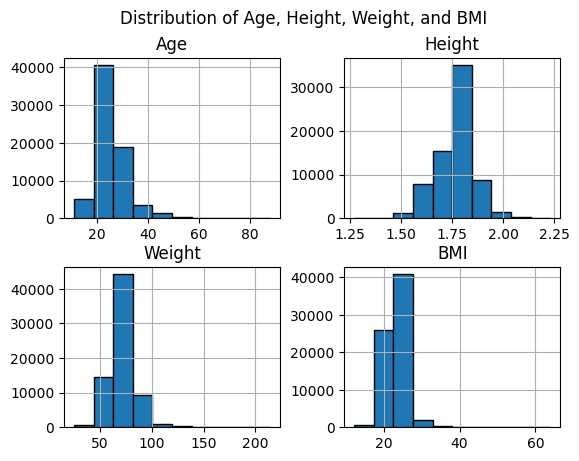

In [15]:
import matplotlib.pyplot as plt

# Specify the columns you want to plot
columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']

# Create histograms
df[columns_to_plot].hist(bins=10, edgecolor='black')

# Display the plots
plt.suptitle('Distribution of Age, Height, Weight, and BMI')
plt.show()

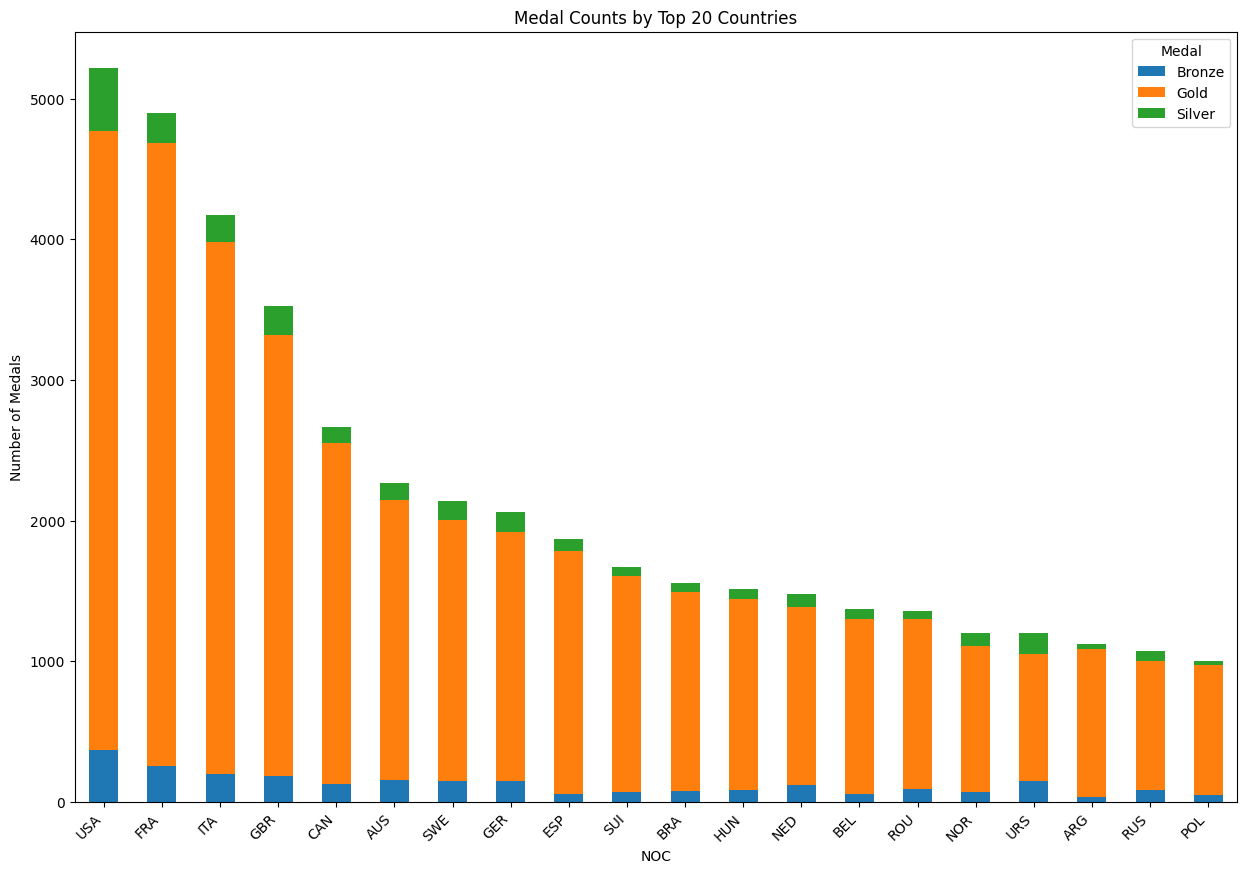

In [16]:
#Top 20 countries by total medals 

# Group by NOC and count medals
medal_counts = df.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)

# Sum the total medals for each country
total_medals = medal_counts.sum(axis=1)

# Get the top 20 countries by total medals
top_20_countries = total_medals.nlargest(20).index

# Filter the medal_counts DataFrame to include only the top 20 countries
top_20_medal_counts = medal_counts.loc[top_20_countries]

# Plot the bar chart
top_20_medal_counts.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Medal Counts by Top 20 Countries')
plt.xlabel('NOC')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

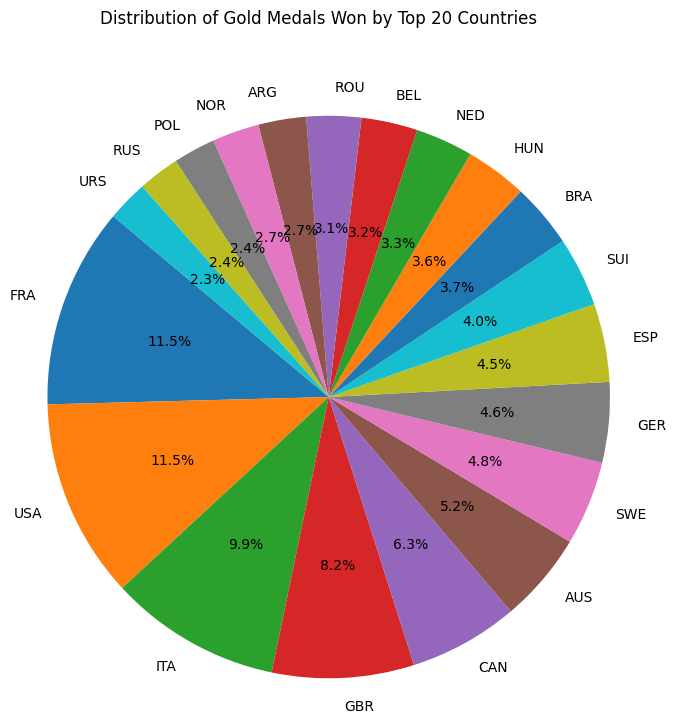

In [17]:
#Top 20 countries winning gold medals
gold_medals = df[df['Medal'] == 'Gold']
gold_medal_counts = gold_medals['NOC'].value_counts().nlargest(20)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(gold_medal_counts, labels=gold_medal_counts.index, autopct='%1.1f%%', startangle=140)
plt.suptitle('Distribution of Gold Medals Won by Top 20 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

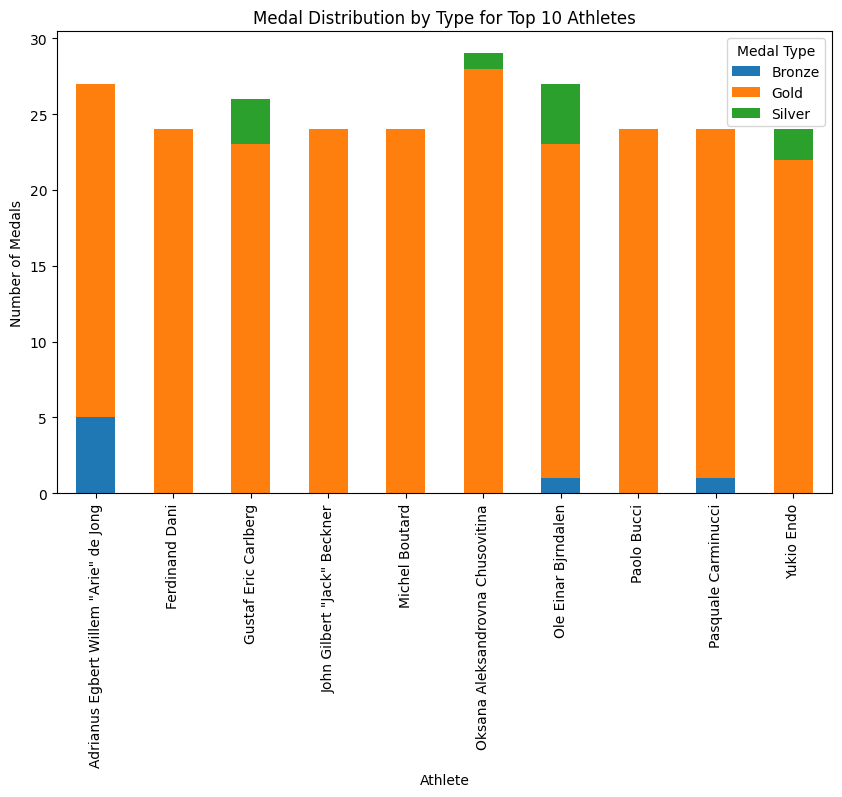

In [18]:
#Top 10 atheletes 
import matplotlib.pyplot as plt

# Filter the dataset for the top 10 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a pivot table to count the medals by type for each athlete
medals_by_type = top_athletes_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)

# Plot the stacked bar chart with a smaller figure size
medals_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medal Distribution by Type for Top 10 Athletes')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.show()

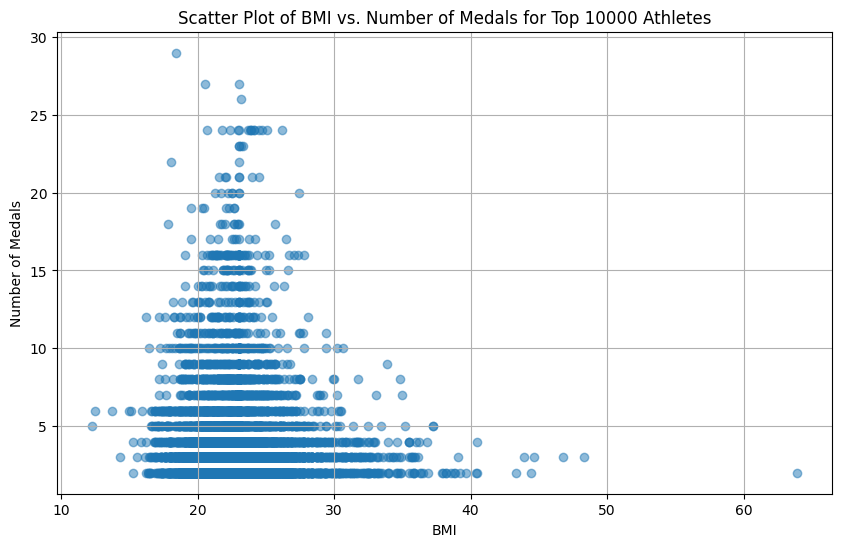

In [34]:
#Top 1000 atheletes ans their BMI 

# Filter the dataset for the top 10000 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10000).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a DataFrame to store the number of medals and BMI for each top athlete
athlete_bmi_medals = top_athletes_df.groupby('Name').agg({
    'BMI': 'mean',  # Average BMI for each athlete
    'Medal': 'count'  # Total number of medals for each athlete
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(athlete_bmi_medals['BMI'], athlete_bmi_medals['Medal'], alpha=0.5)

plt.title('Scatter Plot of BMI vs. Number of Medals for Top 10000 Athletes')
plt.xlabel('BMI')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

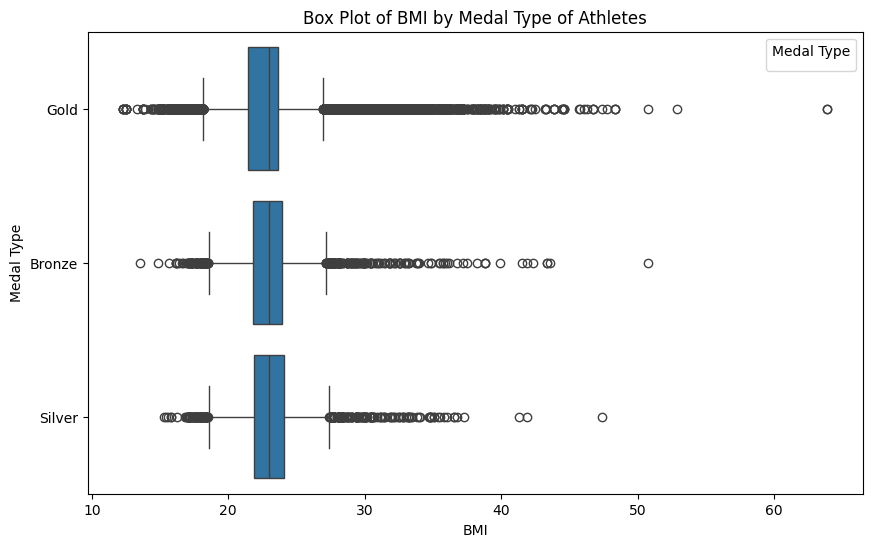

In [35]:
# Install seaborn using the %pip magic command
%pip install seaborn

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Medal', data=df)
plt.title('Box Plot of BMI by Medal Type of Athletes')
plt.xlabel('BMI')
plt.ylabel('Medal Type')

# Manually create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Medal Type')

plt.show()